# Stock Market data
Data will be fetched by web scraping from https://markets.financialcontent.com/ only. <br>
Companies for which stock price data is fetched-
- <b>Apple (AAPL)
- Google (GOOGL)
- Microsoft (MSFT)</b><br>

Packages used-
- pandas
- numpy
- beautifulsoup4
- urllib.request
- matplotlib
- seaborn

In [1]:
import pandas as pd
import numpy as np
import bs4 as bs
import urllib.request as ur
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings(action='once')

### Function to get the page-source of the company's url
It gets the page's source by going to the given url and returns it.

In [2]:
def get_page_source(url):
    with ur.urlopen(url) as page_source:
        return page_source.read()

### Function to scrape the page and return the data as a list
Here all the required data is scraped from the page.<br>
First it gets the page's source from the url given.<br>
It converts the page's source to BeautifulSoup object.<br>
Then it gets the table tag where all the the data is stored.<br>
It takes the data from each table row and stores them as list.<br>
It returns the final list.

In [3]:
def scraping(company):
    scrape_data = []
    page_url = "https://markets.financialcontent.com/stocks/quote/historical?Symbol=%s&Month=6&Year=2018&Range=12"
    source = get_page_source(page_url % company)
    soup = bs.BeautifulSoup(source, "lxml")
    table_data = soup.find("table", class_="quote_detailed_price_table data").find_all("tr")
    for row in table_data:
        r_data = row.find_all("td")
        scrape_data.append([data.text for data in r_data])
    return scrape_data

### Function to create the DataFrame with the scraped_data
The scraped data is converted to DataFrame with column names:
- Open- The price at which the first share was traded for the current trading day.
- High- The highest price at which the stocks were sold for the current trading day.
- Low- The lowest price at which the stocks were sold for the current trading day.
- Close- The price at which the last share was traded for the current trading day.
- Volume- Is the amount of shares bought/sold of a stock in a given period of time.
- Change(%) - This is the difference between the Last Trading Days Closing Price and the Current Price (Last Price).

In [4]:
def create_dframe(scrape_data):
    return pd.DataFrame(scrape_data, columns=["Date", "Open", "High", "Low", "Close", "Volume", "Change(%)"]).set_index("Date")

### Funtion to store the DataFrame as .csv file
Stores the DataFrame as a .csv file so locally so that work can be done w/o fetching data from url again and again.

In [5]:
def to_csv(frame, name):
    frame.to_csv(f"{name}_data.csv", encoding="utf-8")

In [6]:
company_code = ("AAPL", "GOOGL", "MSFT")
company_name = ('Apple','Google','Microsoft')

### Get the page-source, create DataFrame and store the data as .csv

In [7]:
for company in company_code:
    scrape_data = scraping(company)
    frame = create_dframe(scrape_data[1:])
    to_csv(frame, company)

### Get the from local storage to do further analysis

In [8]:
apple = pd.read_csv("AAPL_data.csv", index_col="Date", parse_dates=True)
google = pd.read_csv("GOOGL_data.csv", index_col="Date", parse_dates=True)
microsoft = pd.read_csv("MSFT_data.csv", index_col="Date", parse_dates=True)

In [9]:
companies = (apple, google, microsoft)

### Overview of the DataFrame
Taking a look at the DataFrame of Google to get the idea of the data.

In [10]:
google.head(25)

,Open,High,Low,Close,Volume,Change(%)
Date,,,,,,
2018-06-29,1132.0,1141.0,1127.0,1129.0,"1,578,116",+2.41(+0.21%)
2018-06-28,1112.0,1134.0,1106.0,1127.0,"1,486,670",+9.84(+0.88%)
2018-06-27,1136.0,1146.0,1117.0,1117.0,"1,726,664",-15.68(-1.38%)
2018-06-26,1144.0,1147.0,1129.0,1133.0,"1,733,228",-6.66(-0.58%)
2018-06-25,1155.0,1156.0,1120.0,1139.0,"2,884,024",-30.01(-2.57%)
2018-06-22,1171.0,1175.0,1160.0,1169.0,"1,711,003",-0.15(-0.01%)
2018-06-21,1186.0,1190.0,1163.0,1169.0,"2,247,980",-14.63(-1.24%)
2018-06-20,1183.0,1201.0,1182.0,1184.0,"2,584,053",+5.38(+0.46%)
2018-06-19,1170.0,1183.0,1162.0,1179.0,"2,363,634",-4.89(-0.41%)


In [11]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-06-29 to 2017-07-05
Data columns (total 6 columns):
Open         236 non-null float64
High         246 non-null float64
Low          247 non-null float64
Close        250 non-null float64
Volume       250 non-null object
Change(%)    250 non-null object
dtypes: float64(4), object(2)
memory usage: 13.7+ KB


We can see that the DataFrame of Google has some NaN values and  some values with 0.<br>
The datatype of Volume column in object instead of integer due to comma in b/w the values.<br>
We need to convert the Volume column to integer and handle the rows with NaN and 0 values for all company DataFrames.

### Converting Volume to integer and handling all unnecessary values
We first remove the commas from values of Volume column and then convert its  datatype to int.<br>
Then we fill all the rows with NaN values the latest value for that particular column.<br>
We replace the 0 value in Volume column with the latest value.<br>
At last we convert the DataFrame to .csv file to store it in local storage for future reference.

In [12]:
for i in range(3):
    companies[i]["Volume"] = companies[i]["Volume"].str.replace(",", "").astype(int)
    companies[i].fillna(method="ffill", inplace=True)
    companies[i]["Volume"].replace(0, method="ffill", inplace=True)
    to_csv(companies[i], company_code[i])

In [13]:
apple.head()

,Open,High,Low,Close,Volume,Change(%)
Date,,,,,,
2018-06-29,186.29,187.19,182.91,185.11,22737666,-0.39(-0.21%)
2018-06-28,184.10,186.21,183.80,185.50,17362769,+1.34(+0.73%)
2018-06-27,185.23,187.28,184.03,184.16,25272501,-0.27(-0.15%)
2018-06-26,182.99,186.53,182.54,184.43,24546328,+2.26(+1.24%)
2018-06-25,183.40,184.92,180.74,182.17,31649437,-2.75(-1.49%)


In [14]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-06-29 to 2017-07-05
Data columns (total 6 columns):
Open         250 non-null float64
High         250 non-null float64
Low          250 non-null float64
Close        250 non-null float64
Volume       250 non-null int64
Change(%)    250 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [15]:
# Summary of stats of Apple stock

In [16]:
apple.describe()

,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,169.055600,170.395200,167.802440,169.102160,2.998572e+07
std,11.956423,11.965677,12.006861,11.967977,1.225705e+07
min,142.900000,143.500000,142.410000,142.730000,1.402667e+07
25%,159.297500,160.710000,158.037500,159.677500,2.156252e+07
50%,170.360000,171.935000,168.980000,170.100000,2.650889e+07
75%,175.480000,177.427500,174.785000,176.375000,3.500323e+07
max,194.140000,194.200000,192.360000,193.980000,8.659382e+07


### DataFrame to store Opening and Closing stock pirce of all companies
Storing the Open and Close price of all companies as DataFrame to plot them in one go.

In [17]:
open_price = pd.DataFrame({"AAPL": apple["Open"],
                          "GOOGL": google["Open"],
                          "MSFT": microsoft["Open"]})

In [18]:
close_price = pd.DataFrame({"AAPL": apple["Close"],
                           "GOOGL": google["Close"],
                           "MSFT": microsoft["Close"]})

In [19]:
# Remove all rows with NaN value
open_price.dropna(how="any", inplace=True)

In [20]:
close_price.dropna(how="any", inplace=True)

### Line graph for Open and Close

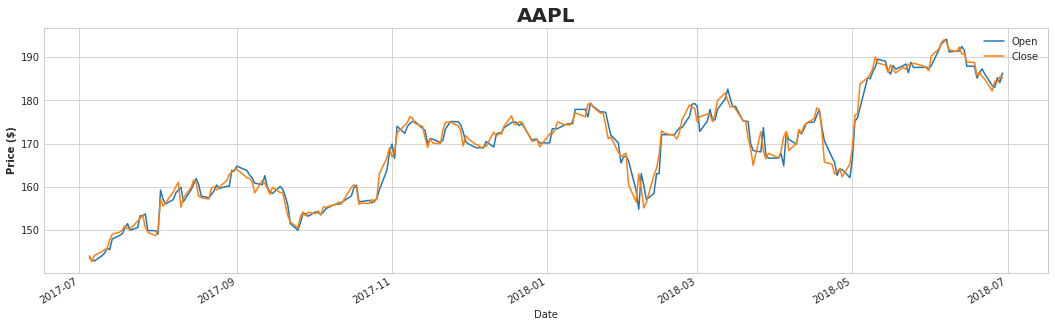

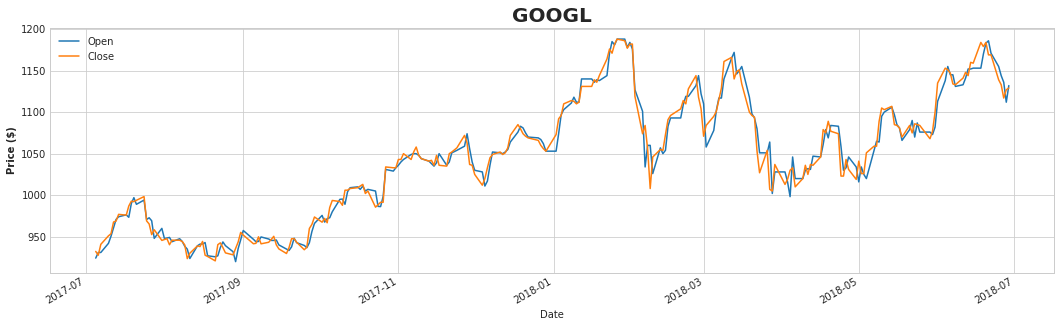

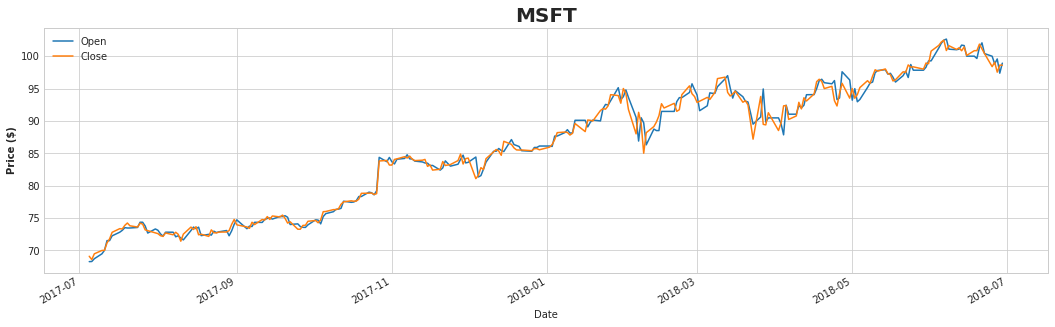

In [21]:
for i in range(3):
    open_price[company_code[i]].plot(grid=True, label="Open")
    close_price[company_code[i]].plot(grid=True, figsize=(18, 5), label="Close")
    plt.title(company_code[i], fontsize=20, fontweight="bold")
    plt.ylabel("Price ($)", fontweight="bold")
    plt.legend()
    plt.show()

From the above graph we can see that for
- <b>Apple</b>:<br>
The maximum growth is b/w 2018-05 to 2018-07.<br>
The random price fluctuation is very less when compared to other companies.
- <b>Google</b>:<br>
The maximum growth is b/w 2018-01 to 2018-03.<br>
It is having the highest fluctuation in random price.
- <b>Microsoft</b>:<br>
The maximum growth is b/w 2018-05 to 2018-07.<br>
The random price fluctuation is in b/w the other two companies.

### DataFrame to store total volume of stock being traded each day

In [22]:
volume = pd.DataFrame({"AAPL": apple["Volume"],
                          "GOOGL": google["Volume"],
                          "MSFT": microsoft["Volume"]})

In [23]:
# Droping all the rows w/ NaN values
volume.dropna(how="any", inplace=True)

### Line graph for Volume

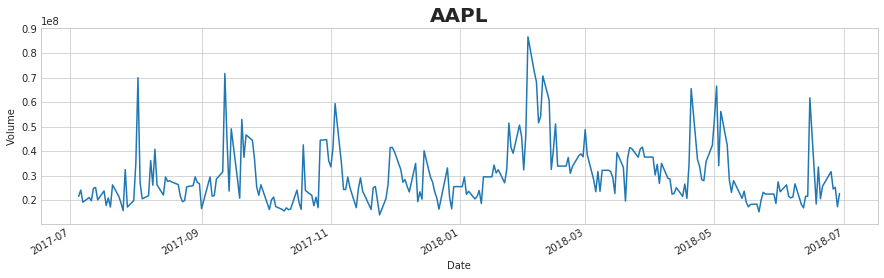

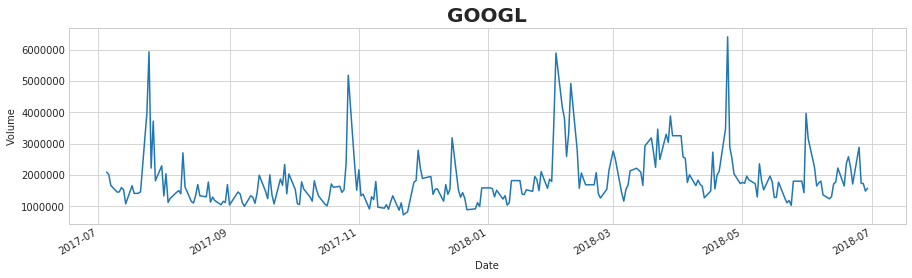

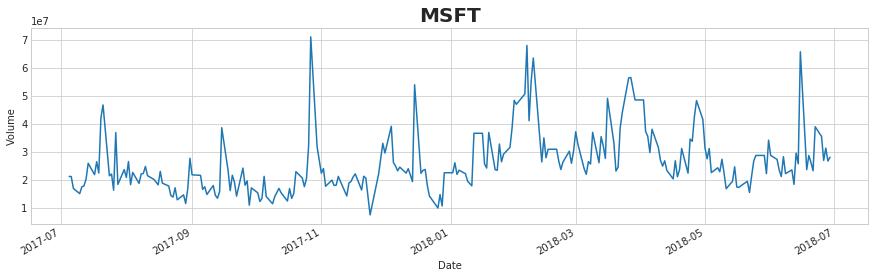

In [24]:
for i in range(3):
    volume[company_code[i]].plot(figsize=(15, 4), grid=True)
    plt.title(company_code[i], fontsize=20, fontweight="bold")
    plt.ylabel("Volume")
    plt.show()

We can see that for:
- Apple: The highest stock being traded was b/w 2018-01 to 2018-03.
- Google: The highest stock being traded was b/w 2018-03 to 2018-05.
- Microsoft: The highest stock being traded was b/w 2017-09 to 2017-11.

### Calculating Daily Returns for all companies
Inorder to analyze the risk of the stock we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the companies stock.

In [25]:
daily_returns = close_price.pct_change()
daily_returns.dropna(how="any", inplace=True)

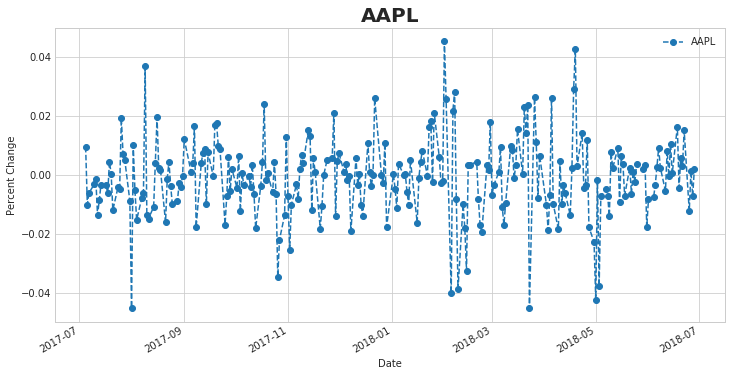

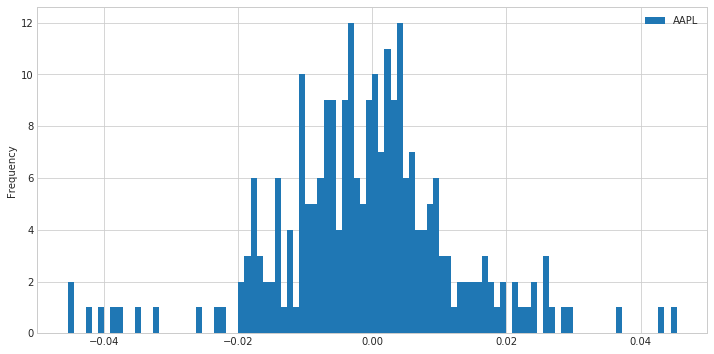

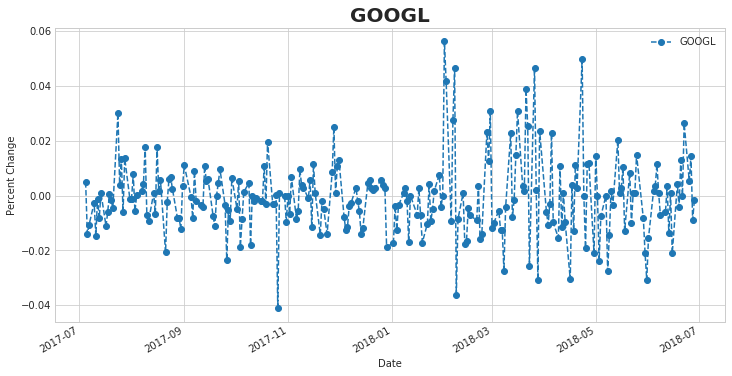

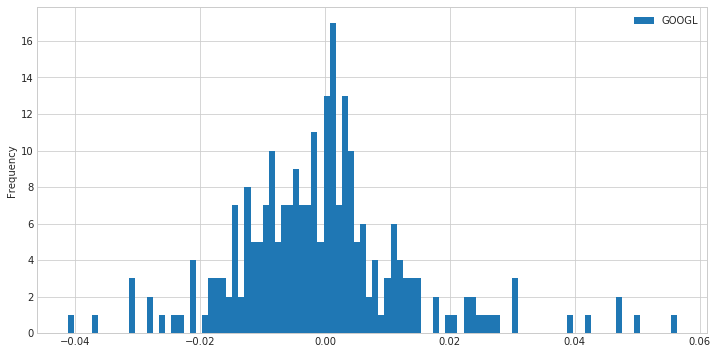

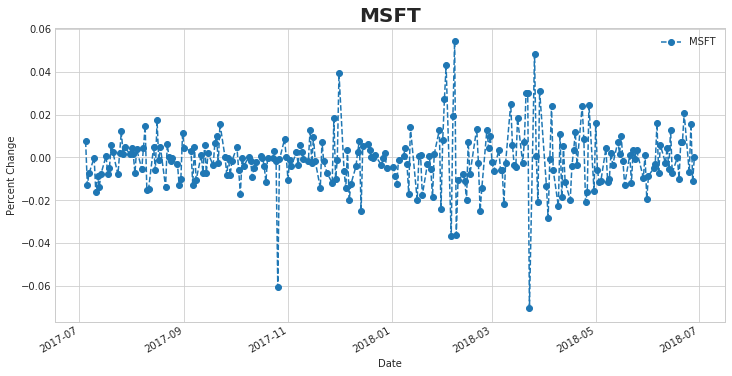

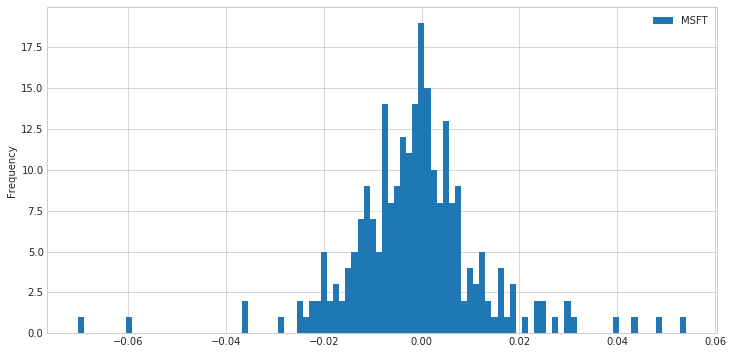

In [26]:
for i in range(3):
    daily_returns[company_code[i]].plot(figsize=(12, 6), grid=True, legend=True, linestyle='--', marker='o')
    plt.ylabel("Percent Change")
    plt.title(company_code[i], fontsize=20, fontweight="bold")
    plt.show()
    daily_returns[company_code[i]].plot.hist(bins=100, figsize=(12, 6), grid=True, legend=True)
    plt.show()

### Correlation b/w companies

/home/abhie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


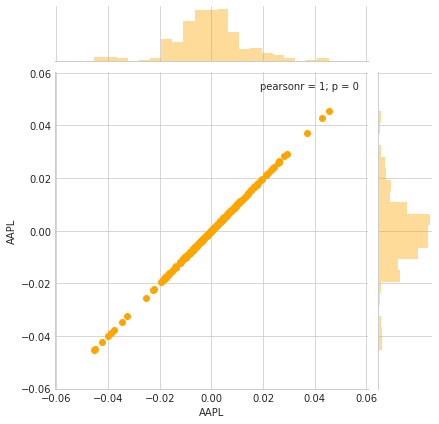

In [27]:
sns.jointplot(daily_returns["AAPL"], daily_returns["AAPL"], daily_returns ,kind='scatter',color='orange')
plt.show()

We can see that if stocks of two companies are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. <br>
So now lets plot the graphs b/w all the companies.

/home/abhie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


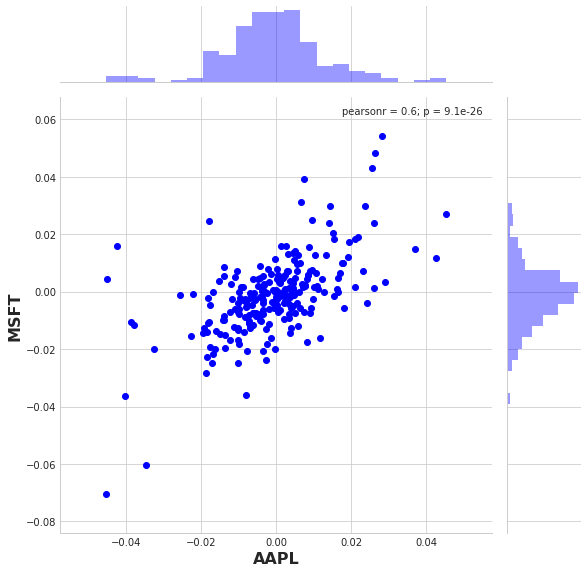

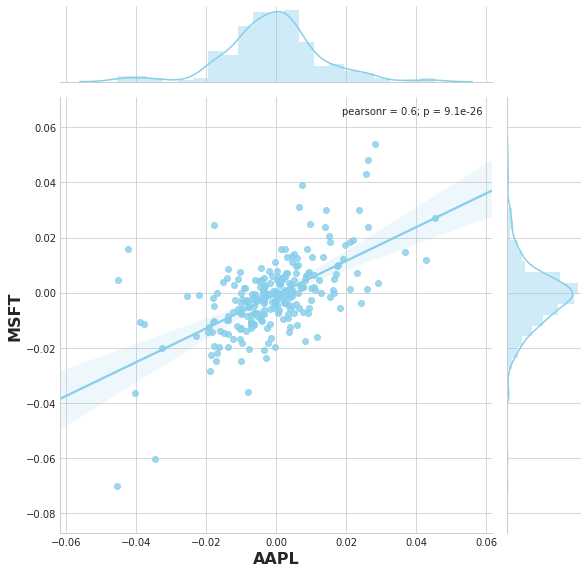

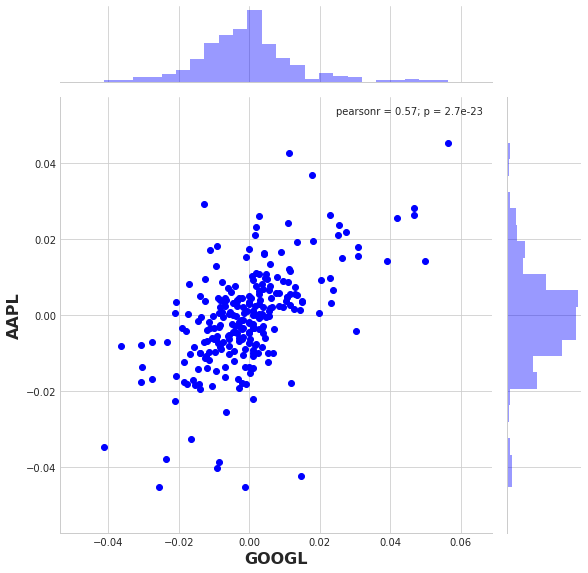

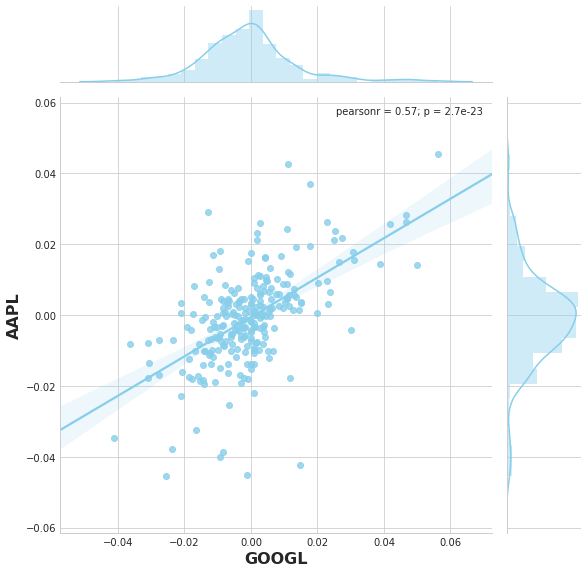

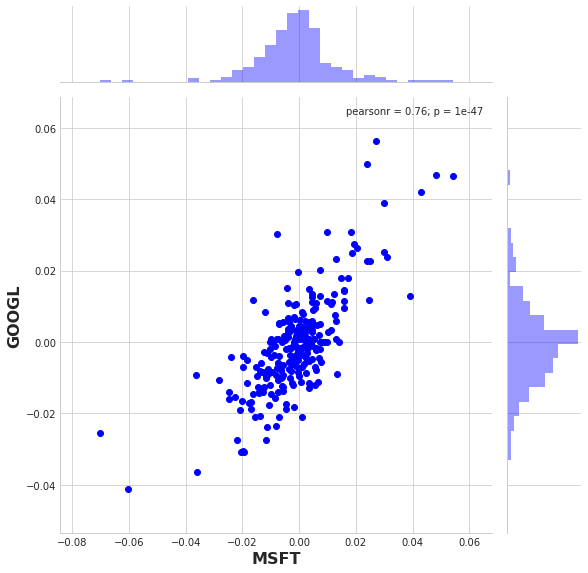

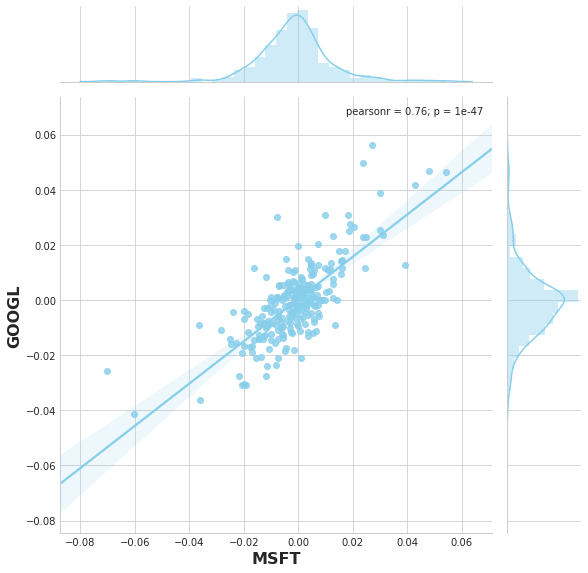

In [28]:
pair = ["MSFT", "AAPL", "GOOGL"]
for i in range(3):
    h = sns.jointplot(daily_returns[company_code[i]], daily_returns[pair[i]], daily_returns ,kind='scatter',color='blue', size=8)
    h.set_axis_labels(company_code[i], pair[i], fontsize=16, fontweight="bold")
    h = sns.jointplot(daily_returns[company_code[i]], daily_returns[pair[i]],daily_returns, kind='reg', size=8, color='skyblue')
    h.set_axis_labels(company_code[i], pair[i], fontsize=16, fontweight="bold")

From all of the above graphs we can see that all the companies are correlated with eachother from the pearsonr value i.e  Pearson Product-Moment Correlation Coefficient.<br>

### Calculating Simple Moving Average(SMA) on all companies

In [29]:
short_rolling = close_price.rolling(window=10).mean().dropna(how="any")      # SMA for 20 days

In [30]:
long_rolling = close_price.rolling(window=50).mean().dropna(how="any")     # SMA for 50 days

In [31]:
start = str(long_rolling.index[0]).split()[0]                               # Date to start plotting

### Plotting SMA for all companies

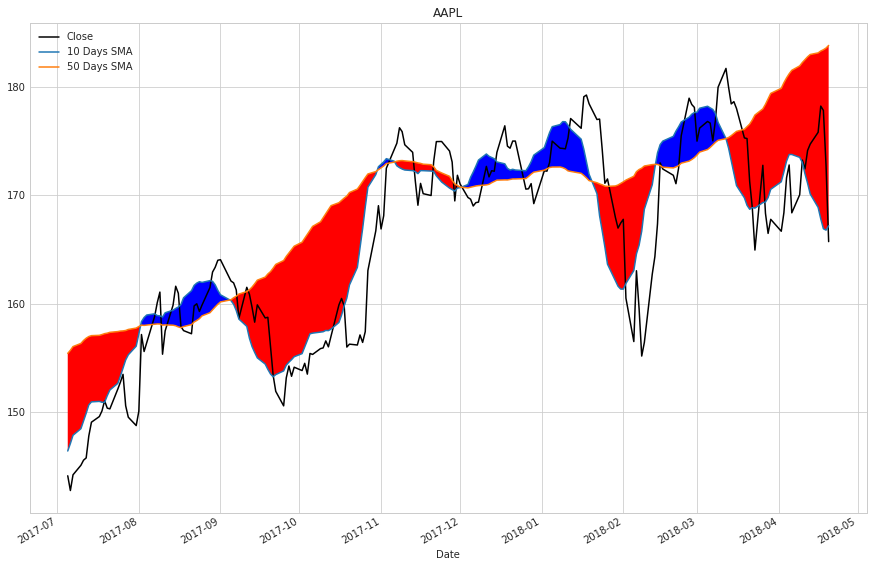

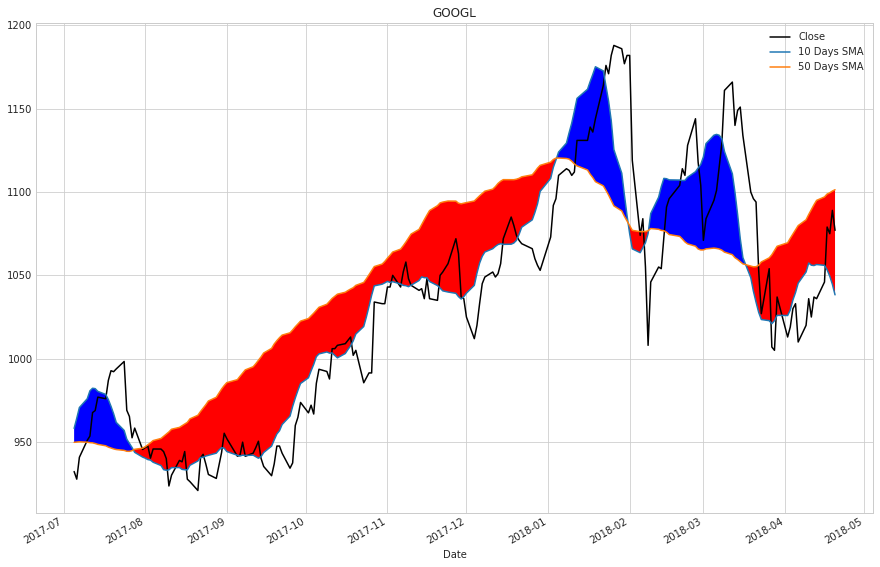

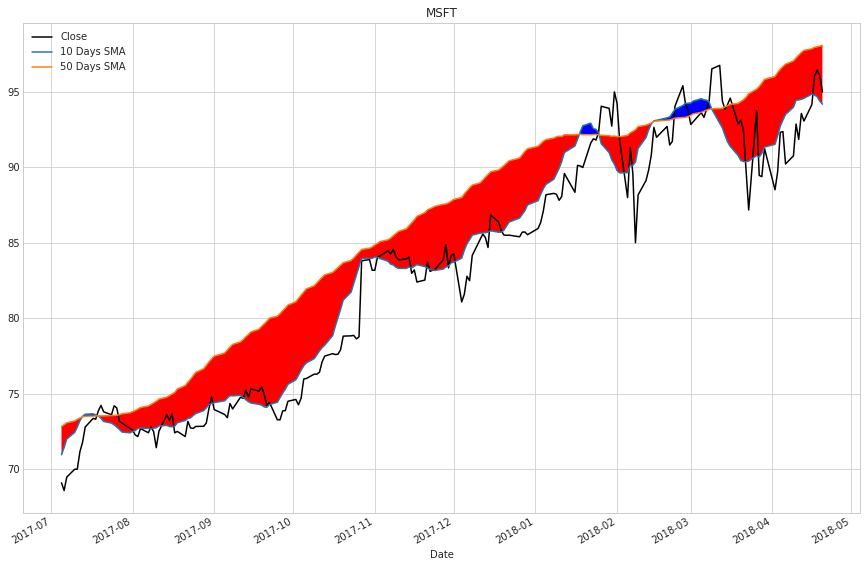

In [32]:
for i in range(3):
    close_price.loc[start:, company_code[i]].plot(x=close_price.loc[start:, company_code[i]].index, label="Close", color="black")
    short_rolling.loc[start:, company_code[i]].plot(x=short_rolling.loc[start:, company_code[i]].index, label="10 Days SMA")
    long_rolling.loc[start:, company_code[i]].plot(x=long_rolling.loc[start:, company_code[i]].index, label="50 Days SMA", figsize=(15, 10))
    plt.fill_between(x=long_rolling.loc[start:, company_code[i]].index, y1=short_rolling.loc[start:, company_code[i]], y2=long_rolling.loc[start:, company_code[i]], where=long_rolling.loc[start:, company_code[i]] > short_rolling.loc[start:, company_code[i]], facecolor='red', interpolate=True)
    plt.fill_between(x=long_rolling.loc[start:, company_code[i]].index, y1=short_rolling.loc[start:, company_code[i]], y2=long_rolling.loc[start:, company_code[i]], where=long_rolling.loc[start:, company_code[i]] < short_rolling.loc[start:, company_code[i]], facecolor='blue', interpolate=True)
    plt.title(company_code[i])
    plt.legend()
    plt.show()

### Calculating Exponential Moving Averages

In [33]:
ema_short = close_price.ewm(span=20, adjust=False).mean()

In [34]:
start = start = str(short_rolling.index[0]).split()[0]

### Plotting EMA

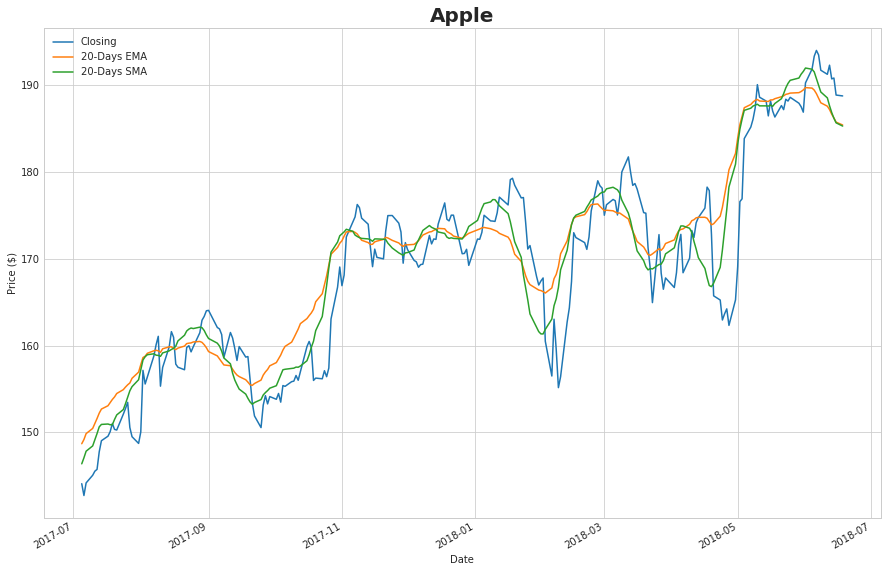

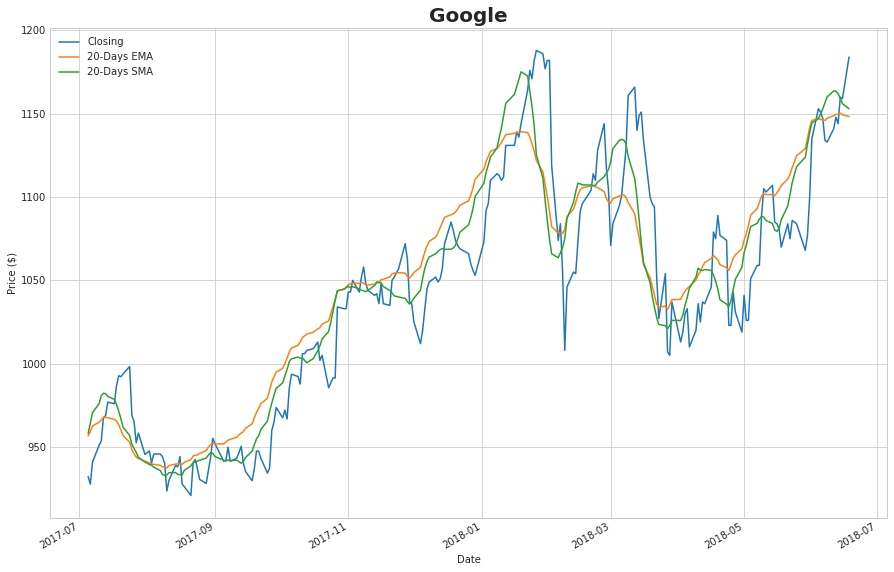

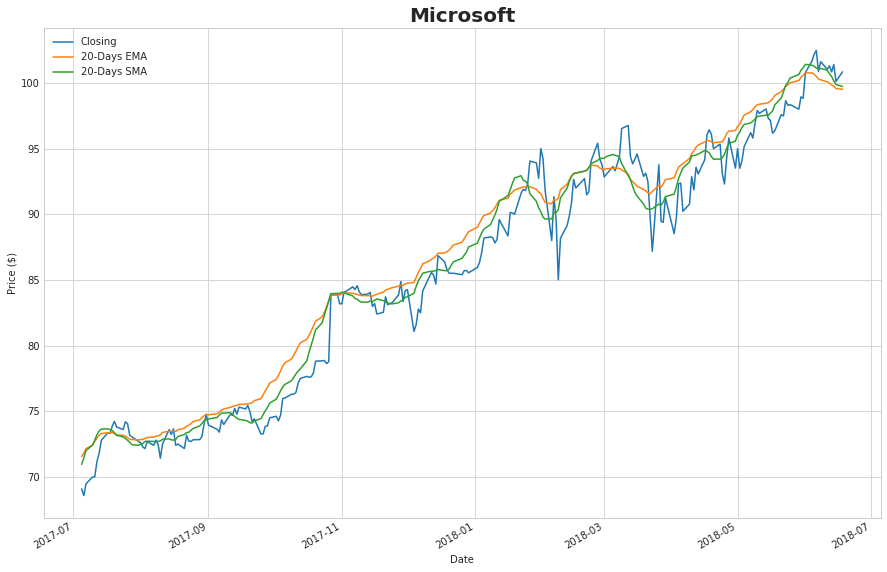

In [35]:
for i in range(3):
    close_price.loc[start:, company_code[i]].plot(x=close_price.loc[start:].index, label="Closing")
    ema_short.loc[start:, company_code[i]].plot(x=long_rolling.loc[start:].index, label="20-Days EMA")
    short_rolling.loc[start:, company_code[i]].plot(x=short_rolling.loc[start:].index,  label="20-Days SMA", grid=True,figsize=(15, 10))
    plt.ylabel("Price ($)")
    plt.title("{}".format(company_name[i]), fontsize=20, fontweight="bold")
    plt.legend(loc="upper left")
    plt.show()

In [36]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/home/abhie/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/abhie/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/abhie/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/abhie/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [37]:
companies = ('AAPL_data.csv','GOOGL_data.csv','MSFT_data.csv')


                                         Prediction for Apple                                        


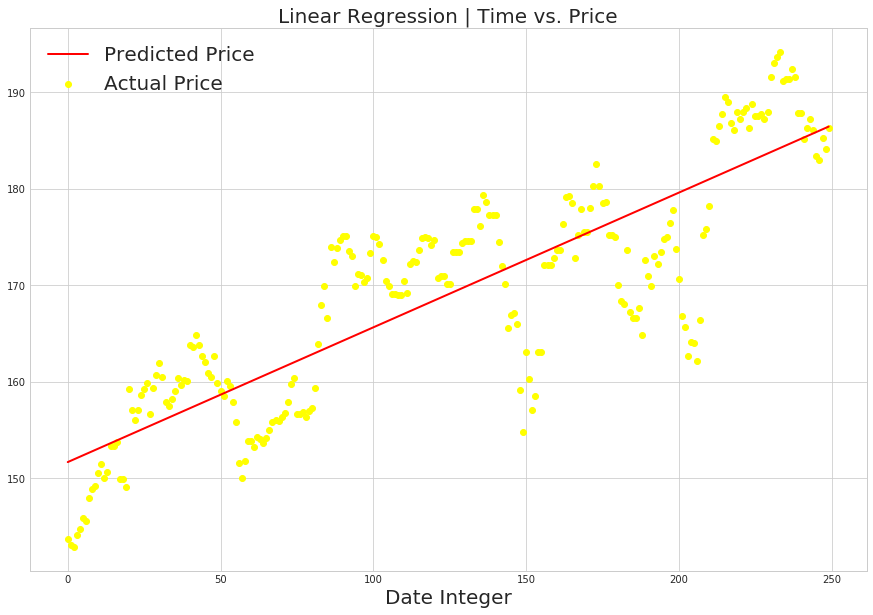

Predicted price : 186.73126787692604
Regression Coefficient : 0.1397285998175971
Regression Intercept : 151.65938932270916

                                        Prediction for Google                                        


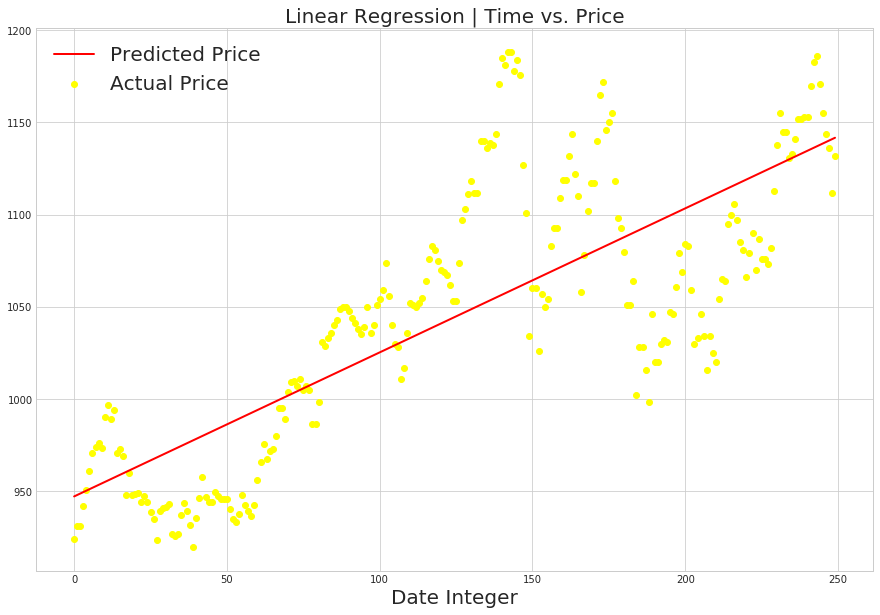

Predicted price : 1143.276211007536
Regression Coefficient : 0.7813502846445544
Regression Intercept : 947.1572895617528

                                       Prediction for Microsoft                                      


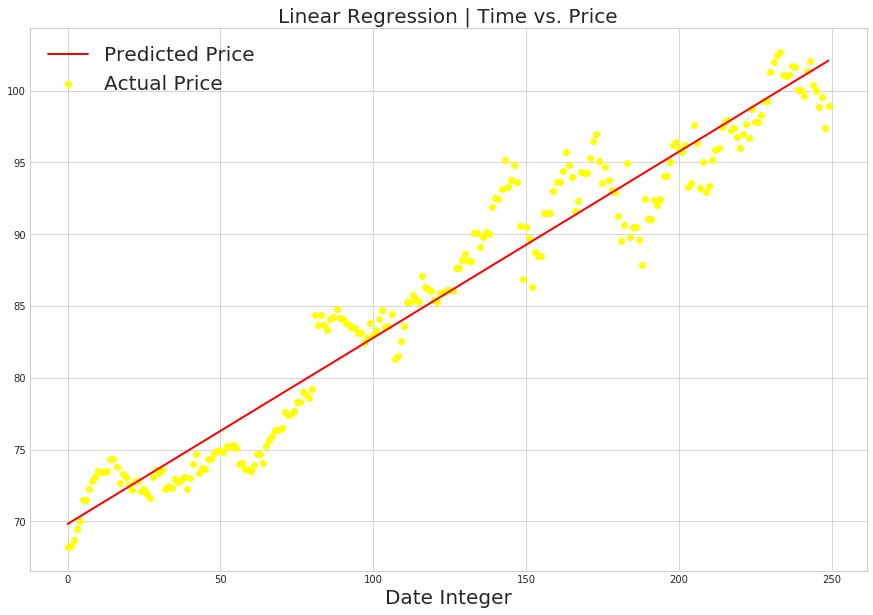

Predicted price : 102.34596460231364
Regression Coefficient : 0.12958580713291418
Regression Intercept : 69.81992701195219


In [38]:
for i in range(3):
    df = pd.read_csv(companies[i])
    prices = df['Open'].tolist()
    dates = list(reversed(range(len(prices))))

    #Convert to 1d Vector
    dates = np.reshape(dates, (len(dates), 1))
    prices = np.reshape(prices, (len(prices), 1))
    regressor = LinearRegression()
    regressor.fit(dates, prices)
    
    #Visualize Results
    print('\n\033[1m',("Prediction for "+company_name[i]).center(100))
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.scatter(dates, prices, color='yellow', label= 'Actual Price')    #plotting the initial datapoints
    plt.plot(dates, regressor.predict(dates), color='red', linewidth=2, label = 'Predicted Price')    #plotting the line made by linear regression
    plt.title('Linear Regression | Time vs. Price', fontsize=20)
    plt.legend(loc="upper left", fontsize=20)
    plt.xlabel('Date Integer', fontsize=20)
    plt.show()
 
    #Predict Price on Given Date
    date = len(dates)+1
    predicted_price =regressor.predict(date)
    print("Predicted price :", predicted_price[0][0])
    print("Regression Coefficient :", regressor.coef_[0][0])
    print("Regression Intercept :", regressor.intercept_[0])